In [1]:
import numpy as np 
import os
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import layers
import cv2

2023-07-20 17:08:29.895679: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-07-20 17:08:30.376481: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
#setting directory 
base_filename = "skimage_norm_sat"
dir_path = f"/home/neureol/FD/preprocessed_clean_images/{base_filename}/"

In [3]:
# setting train and tests size and batching parameters
val_size = 0.3
batch_size = None

In [4]:
# setting img parameters
img_height = 224
img_width = 224
img_size = (img_height, img_width)

In [5]:
# train dataset in batches
train_ds = tf.keras.utils.image_dataset_from_directory(
    directory = dir_path,
    validation_split=val_size,
    subset="training",
    seed=0,
    image_size=img_size,
    batch_size=batch_size,
    color_mode="rgb",
)

Found 3410 files belonging to 2 classes.
Using 2387 files for training.


2023-07-20 17:08:31.481866: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-07-20 17:08:31.497768: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-07-20 17:08:31.497915: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysf

In [6]:
# looking up the train_ds info 
print(f"train_ds length: {len(train_ds)}")
print(f"train_ds type: {type(train_ds)}")

train_ds length: 2387
train_ds type: <class 'tensorflow.python.data.ops.shuffle_op._ShuffleDataset'>


In [7]:
# combination of validation and test dataset in batches
val_test_ds  = tf.keras.utils.image_dataset_from_directory(
    directory = dir_path,
    validation_split=val_size,
    subset="validation",
    seed=0,
    image_size=img_size,
    batch_size=batch_size,
    color_mode="rgb",
)

Found 3410 files belonging to 2 classes.
Using 1023 files for validation.


In [8]:
# looking up the val_test_ds info
print(f"val_test_ds length: {len(val_test_ds)}")
print(f"val_test_ds type: {type(val_test_ds)}")

val_test_ds length: 1023
val_test_ds type: <class 'tensorflow.python.data.ops.shuffle_op._ShuffleDataset'>


In [9]:
# setting validation and test split 
test_split = 0.3
test_size = int(len(val_test_ds)*test_split)

In [10]:
test_ds = val_test_ds.take(test_size)
val_ds = val_test_ds.skip(test_size)

2023-07-20 17:08:32.187103: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype string and shape [2387]
	 [[{{node Placeholder/_0}}]]
2023-07-20 17:08:32.187289: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [2387]
	 [[{{node Placeholder/_4}}]]
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


train img lbl: 1


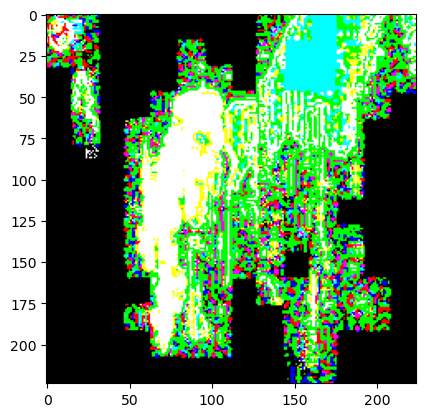

2023-07-20 17:08:32.449743: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype string and shape [1023]
	 [[{{node Placeholder/_0}}]]
2023-07-20 17:08:32.449993: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype string and shape [1023]
	 [[{{node Placeholder/_0}}]]
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


test img lbl: 1


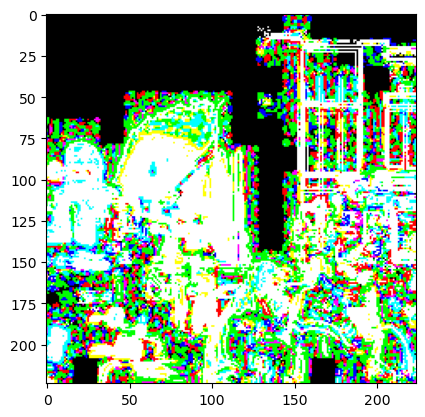

2023-07-20 17:08:32.716290: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [1023]
	 [[{{node Placeholder/_4}}]]
2023-07-20 17:08:32.716523: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [1023]
	 [[{{node Placeholder/_4}}]]
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


val img lbl: 1


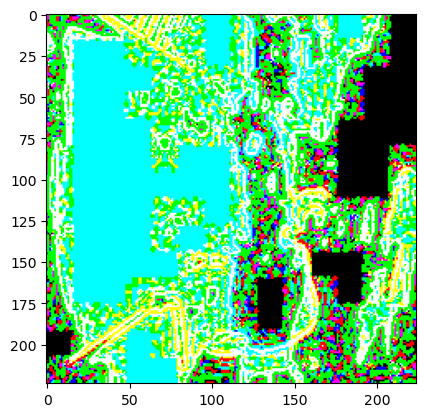

In [11]:
# train_ds
for img, lbl in train_ds:
    print(f"train img lbl: {lbl}")
    plt.imshow(img)
    plt.show()
    break

# test_ds
for img, lbl in test_ds:
    print(f"test img lbl: {lbl}")
    plt.imshow(img)
    plt.show()
    break

# val_ds
for img, lbl in val_ds:
    print(f"val img lbl: {lbl}")
    plt.imshow(img)
    plt.show()
    break

In [12]:
def augment(image, label):
    new_height = new_width = 32
    image = tf.image.resize(image, (new_height, new_width))

    if tf.random.uniform((), minval=0, maxval=1) < 0.1:
        image = tf.tile(tf.image.rgb_to_grayscale(image), [1, 1, 3])

    image = tf.image.random_brightness(image, max_delta=0.1)
    image = tf.image.random_contrast(image, lower=0.1, upper=0.2)

    
    image = tf.image.random_flip_left_right(image)  # 50%
    # image = tf.image.random_flip_up_down(image) #%50%

    return image, label


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


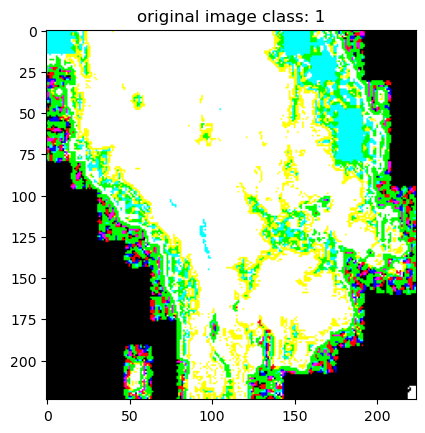

In [13]:
# extarcting an image for augmentation testing

image, lbl = next(iter(train_ds))
_ = plt.imshow(image)
_ = plt.title(f"original image class: {lbl}")

In [14]:
image = tf.cast(tf.expand_dims(image, 0), tf.float32)

plt.figure(figsize=(10, 10))
for i in range(9):
    augmented_image = augment(image)
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(augmented_image[0])
    plt.axis("off")

TypeError: augment() missing 1 required positional argument: 'label'

<Figure size 1000x1000 with 0 Axes>

In [ ]:
# Function to apply data augmentation to the dataset

batch_size = 100

AUTOTUNE = tf.data.AUTOTUNE

def prepare(ds, shuffle=False, augment=False):
    # shuffle dataset if needed
    if shuffle:
        ds = ds.shuffle(1000)
    
    # batch the dataset 
    ds = ds.batch(batch_size)

    # rescale the dataset
    ds = ds.map(lambda x, y: (rescale_layer(x), y), num_parallel_calls=AUTOTUNE)

    # use data augment if needed 
    if augment:
        ds = ds.map(lambda x, y: (data_augmentation(x, training=True), y), num_parallel_calls=AUTOTUNE)
    
    # use buffered prefercting on all datasets
    return ds.prefetch(buffer_size=AUTOTUNE)

In [ ]:
# applying augmentation to the train_ds
train_ds_augment = prepare (train_ds, shuffle=True, augment=True)
train_ds=prepare(train_ds,shuffle=True)
val_ds=prepare(val_ds)
test_ds=prepare(test_ds)
dataset= train_ds_augment.concatenate(train_ds)

In [ ]:
print(type(train_ds_augment))
print(len(train_ds))
print(len(dataset))

In [ ]:
for img_list, lbl_list in train_ds_augment.take(4):
    plt.imshow(img_list[0])
    plt.show()
    break

In [ ]:
# testing if augmentation works on the augmented dataset
for img_batch, lbl_batch in train_ds_augment:
    for img_list, lbl_list in zip(img_batch, lbl_batch):
        print(f"img_list shape: {img_list.shape}")
        print(f"lbl_list shape: {lbl_list.shape}")
        break
    break
        

In [ ]:
base_model=tf.keras.applications.resnet50.ResNet50(include_top=False, weights='imagenet',input_shape=(224,224,3))# From imageNet
global_average_layer = tf.keras.layers.GlobalAveragePooling2D()
prediction_layer = tf.keras.layers.Dense(1,activation='sigmoid')
preprocess_input = tf.keras.applications.resnet50.preprocess_input

base_model.trainable = False


inputs = tf.keras.Input(shape=(224, 224, 3))

# x = preprocess_input(inputs)
x = base_model(inputs, training=False)
# x = global_average_layer(x)
x= tf.keras.layers.Flatten()(x)
x = tf.keras.layers.Dropout(0.2)(x)
x=tf.keras.layers.Dense(64,activation='relu')(x)
x = tf.keras.layers.Dropout(0.2)(x)
x=tf.keras.layers.Dense(32,activation='relu')(x)
outputs = tf.keras.layers.Dense(1,activation='sigmoid')(x)
model = tf.keras.Model(inputs, outputs)




In [ ]:
base_learning_rate = 0.0001
model.compile(loss='binary_crossentropy',
              optimizer = tf.keras.optimizers.RMSprop(learning_rate=base_learning_rate),
              metrics=['accuracy'])

In [ ]:
initial_epochs=4
history = model.fit(dataset,
                    epochs=initial_epochs,
                    validation_data=val_ds)

In [ ]:
base_model.trainable = True

In [ ]:
# Let's take a look to see how many layers are in the base model
print("Number of layers in the base model: ", len(base_model.layers))

# Fine-tune from this layer onwards
fine_tune_at = 200

# Freeze all the layers before the `fine_tune_at` layer
for layer in base_model.layers[:fine_tune_at]:
  layer.trainable = False

In [ ]:
model.compile(loss='binary_crossentropy',
              optimizer = tf.keras.optimizers.RMSprop(learning_rate=base_learning_rate/10),
              metrics=['accuracy'])

In [ ]:
len(model.trainable_variables)

In [ ]:
fine_tune_epochs = 8
total_epochs =  initial_epochs + fine_tune_epochs

history_fine = model.fit(dataset,
                         epochs=total_epochs,
                         initial_epoch=history.epoch[-1],
                         validation_data=val_ds)

In [ ]:
from sklearn.metrics import accuracy_score
X_test=[]
y_test=[]
for img_batch,lbl_batch in test_ds:
    for img,lbl in zip(img_batch,lbl_batch):
        X_test.append(img)
        y_test.append(lbl)
X_test=np.array(X_test)
y_test=np.array(y_test)
predictions=model.predict(X_test)
print(predictions.shape)

prediction=[]
for i in predictions:
    if i>=0.5:
        prediction.append(1)
    else:
        prediction.append(0)
print(accuracy_score(prediction,y_test))

In [ ]:
import numpy as np
from skimage import filters,color,img_as_ubyte
from skimage.filters import threshold_otsu,gabor
from skimage.feature import local_binary_pattern
import glob
import cv2
import copy
import progressbar
from PIL import Image

def normalize(input_image):
    hsv_image=tf.image.rgb_to_hsv(input_image)
    h,s,v=tf.split(hsv_image,num_or_size_splits=3,axis=-1)
    # print(f"existing saturation is {s}")
    normalized_s=tf.image.per_image_standardization(s)
    # print(f"normalized saturation is {normalized_s}")
    # Concatenate the channels back together
    normalized_hsv_image = tf.concat([h, normalized_s, v], axis=-1)

    # Convert the image back to RGB color space
    normalized_image = tf.image.hsv_to_rgb(normalized_hsv_image)
    return normalized_image

def removegreen(input_image):
    input_image=tf.cast(input_image,dtype=tf.float32)
    input_image=np.copy(input_image)
    input_image[:, :, 1] = 0
    return np.array(input_image)

def gaussianblur(input_image):
    blurred_image = filters.gaussian(input_image, sigma=1, channel_axis=False)
    return blurred_image
def edgesobel(input_image):
    sobel_image=filters.sobel(input_image)
    return sobel_image
def otsu(input_image):
    #grayscale_image = color.rgb2gray(image_file)
    #grayscale_image = tf.squeeze(grayscale_image)
    #grayscale_image_np = grayscale_image.numpy()
    im=tf.squeeze(input_image)
    im_np=im.numpy()
    # Apply Otsu's thresholding
    thresh = threshold_otsu(im_np)
    binary_image = im_np > thresh
    # Create the binary image using the threshold
    binary_image = img_as_ubyte(binary_image)
    binary_image=np.array(binary_image)
    return binary_image
def preprocessing_gaus_otsu(img):
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    gaussian_blur_image = cv2.GaussianBlur(src=gray, ksize=(3,3), sigmaX=0, sigmaY=0)
    #sobelxy = cv2.Sobel(src=gaussian_blur_image, ddepth=cv2.CV_64F, dx=1, dy=1, ksize=1)
    (T, threshOtsu) = cv2.threshold(
        gaussian_blur_image, 
        0, 
        215, 
        cv2.THRESH_OTSU)
    
    otsu_result = cv2.bitwise_and(img,img, mask=threshOtsu)
    #img_array = np.array(otsu_result)
    #img_final = Image.fromarray(img_array)
    return otsu_result

def image_preprocessing(image):
    # 1. Noise removal
    image = cv2.fastNlMeansDenoisingColored(image, None, 10, 10, 7, 21)

    # 2. Contrast enhancement
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
    image = clahe.apply(image)

    # 3. Edge detection
    edged = cv2.Canny(image, 100, 200)

    # 4. Thresholding
    thresh = cv2.threshold(edged, 127, 255, cv2.THRESH_BINARY)[1]

    return thresh

def corner_cases():
    
    # Set the path to the directory containing your images
    data_directory = os.path.join("/home/neureol/FireDetect","testimags")
    original_list = []
    img_paths = []
    filtered_images=[]
    filtered_images_list=[]
    normalized_images_list=[]
    types = ["/*.jpg", "/*.png", "/*.jpeg"]
    for type in types:
        img_paths.extend(glob.glob(data_directory + type))

    with progressbar.ProgressBar(max_value=len(img_paths)) as bar:
        for count, img_path in enumerate(img_paths):
            
                # read img
                imgRead = cv2.imread(img_path)
                # resize img
                imgRead = cv2.resize(imgRead, (224, 224))
                #appending the actual images for plotting purposes
                imgRead=cv2.cvtColor(imgRead, cv2.COLOR_BGR2RGB)
                original_list.append(Image.fromarray(imgRead))
                normalized_images_list.append(imgRead)
    normalized_images=normalize(normalized_images_list)
    with progressbar.ProgressBar(max_value=len(normalized_images)) as bar:
        for count, img in enumerate(normalized_images):
            #try:
                # read img
                # imgRead = cv2.imread(img_path)
                # resize img
                # imgRead = cv2.resize(imgRead, (224, 224))
                #appending the actual images for plotting purposes
                # imgRead=cv2.cvtColor(imgRead, cv2.COLOR_BGR2RGB)
                # original_list.append(imgRead)
                
                # preprocessing
                pre_processed_img_array = image_preprocessing(img)
                # color_img = cv2.cvtColor(pre_processed_img_array, cv2.COLOR_GRAY2RGB)
                filtered_images.append(np.array(pre_processed_img_array))
                filtered_images_list.append(Image.fromarray(pre_processed_img_array))

                bar.update(count)
            # except Exception or Warning as err:
            #     print(f"Error in preprocessing images: {err}")
            #     print(f"img Path that failed: {img_path}")
                # bar.update(count)
                # continue
    
    filtered_images_array=np.array(filtered_images).reshape(np.array(filtered_images).shape[0],224,224,3)
    print(filtered_images_array.shape)
    # print(type(original_list))            
    preds=model.predict(filtered_images_array)
    pred=[]
    for i in preds:
        if i>=0.5:
            pred.append(1)
        else:
            pred.append(0)
    print(pred)
    i=len(original_list)
    fig,ax=plt.subplots(i,1,figsize=(30,30))
    for count,i in enumerate(original_list):
        ax[count].imshow(i)
        ax[count].set_title(f'{pred[count]}')
        # ax[i+1].imshow(filtered_images_list[i])
        # ax[j].imshow(filtered_images_list[i])
    plt.axis('off')
    plt.subplots_adjust(hspace=2, wspace=2)
    plt.show()

    i=len(filtered_images_list)
    fig,ax=plt.subplots(i,1,figsize=(30,30))
    for count,i in enumerate(filtered_images_list):
        ax[count].imshow(i)
        # ax[count].set_title(f'{pred[count]}')
        # ax[i+1].imshow(filtered_images_list[i])
        # ax[j].imshow(filtered_images_list[i])
    plt.axis('off')
    plt.subplots_adjust(hspace=2, wspace=2)
    plt.show()

    print(np.array(original_list).shape)
    # normalized_img=normalize(np.array(image_list))
    # #Gaussian Sobel Otsu

   
    

corner_cases()

In [ ]:
def image_preprocessing(image):
    # normalized_images=normalize(input_images)
    #Gaussian Sobel Otsu
    # normalize_img=normalize(image)
    blurred_image=gaussianblur(image)
    sobel_image=edgesobel(blurred_image)
    otsu_image=otsu(sobel_image)
    # remove_green_img=removegreen(otsu_image)
    return otsu_image

